# Fourier Series Fourier_log.ipynb

2021.01.06

In [90]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:93% !important; }</style>"))

# Hata Models


[Hata Model](https://en.wikipedia.org/wiki/Hata_model#:~:text=The%20Hata%20model%20is%20a,as%20the%20Okumura%E2%80%93Hata%20model.)

The Hata model for urban environments is the basic formulation since it was based on Okumura's measurements made in the built-up areas of Tokyo. It is formulated as following:<br>
$\displaystyle L_{U}\;=\;69.55\;+\;26.16\;\log_{10}f\;-\;13.82\;\log_{10}h_{B}\;-\;C_{H}\;+\;
[44.9\;-\;6.55\;\log_{10}h_{B}]\;\log_{10}d$

where<br>
$L_U$ = Path loss in urban areas. Unit: decibel (dB)<br>
$h_B$ = Height of base station antenna. Unit: meter (m)<br>
$h_M$ = Height of mobile station antenna. Unit: meter (m)<br>
$f$ = Frequency of transmission. Unit: Megahertz (MHz)<br>
$C_H$ = Antenna height correction factor<br>
$d$ = Distance between the base and mobile stations. Unit: kilometer (km).<br>

The Hata model for rural environments is applicable to the transmissions in open areas where no obstructions block the transmission link. It is formulated as:

$\displaystyle L_{O}\;=\;L_{U}\;-\;4.78 {\big(} \log_{10}{f}{\big )}^{2}\;+\;18.33{\big (}\log_{10}{f}{\big)}-\;40.94$

$L_{U}\;=\;69.55\;+\;26.16\;\log_{10}f\;-\;13.82\;\log_{10}h_{M}\;-\;C_{H}\;+\;
[44.9\;-\;6.55\;\log_{10}h_{B}]\;\log_{10}d$

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

f=2000 #MHz
C1 = np.round(-4.78*np.log10(f)**2 + 18.33*np.log10(f) - 40.94,2)
print(f'Assuming f is constant,    Lo = Lu + C1 ')
print(f'E.g., when f={f} MHz,     Lo = Lu + ({C1})')

print('------------')

hb = 8   # m
hm = 1.5 # m
Ch = 0
C2 = np.round( 69.55 + 26.16*np.log10(f) -13.82*np.log10(hb) - Ch , 2)
B = np.round( 44.0 - 6.55*np.log10(hb), 2)

print('If hb, hM, f, Ch, are all fixed, then Lu = C2 + B*long10(d_km)')
print(f'E.g., when hb={hb} m, hM={hm} m, f={f} MHz, Ch={Ch},     C2={C2}, B={B} and     Lu = {C2} + ({B})log10(d_km)')

print('------------')

A = np.round(C1+C2,2)
print('If hb, hM, f, Ch, are all fixed, then Lo = A + B*long10(d_km)')
print(f'E.g., when hb={hb} m, hM={hm} m, f={f} MHz, Ch={Ch},     A={A}, B={B} and     Lu = {A} + ({B})log10(d_km)')


print('------------')
A2 = np.round(A - B*3,2)
print(f'E.g., when hb={hb} m, hM={hm} m, f={f} MHz, Ch={Ch},     A2={A2}, B={B} and     Lu = ({A2}) + ({B})log10(d_m)')



Assuming f is constant,    Lo = Lu + C1 
E.g., when f=2000 MHz,     Lo = Lu + (-32.52)
------------
If hb, hM, f, Ch, are all fixed, then Lu = C2 + B*long10(d_km)
E.g., when hb=8 m, hM=1.5 m, f=2000 MHz, Ch=0,     C2=143.42, B=38.08 and     Lu = 143.42 + (38.08)log10(d_km)
------------
If hb, hM, f, Ch, are all fixed, then Lo = A + B*long10(d_km)
E.g., when hb=8 m, hM=1.5 m, f=2000 MHz, Ch=0,     A=110.9, B=38.08 and     Lu = 110.9 + (38.08)log10(d_km)
------------
E.g., when hb=8 m, hM=1.5 m, f=2000 MHz, Ch=0,     A2=-3.34, B=38.08 and     Lu = (-3.34) + (38.08)log10(d_m)


In [93]:
def hata_v1(d_m):
    A2 = -3.34
    B  = 38.08 
    return (A2 + B*np.log10(d_m))

[COST Hata Model](https://en.wikipedia.org/wiki/COST_Hata_model)

$\displaystyle L_{b}=46.3+33.9\log_{10}{\frac {f}{\text{MHz}}}-13.82\log_{10}{\frac{h_{B}}{\text{m}}}-a(h_{R},f)+
\left(44.9-6.55\log_{10}{\frac{h_{B}}{\text{m}}}\right)\log_{10}{\frac{d}{\text{km}}}+C_{m}$

where,

$\displaystyle L_{b}$	Median path loss. Unit: decibel (dB)<br>
$\displaystyle f$	Frequency of Transmission. Unit: megahertz (MHz)<br>
$\displaystyle h_{B}$	Base station antenna effective height. Unit: meter (m)<br>
$\displaystyle d$	Link distance. Unit: Kilometer (km)<br>
$\displaystyle h_{R}$	Mobile station antenna effective height. Unit: meter (m)<br>

$\displaystyle a(h_{R},f)$	= Mobile station antenna height correction factor as described in the Hata model for urban areas.
<br>
For suburban or rural environments this factor is defined as,
<br>
$\displaystyle a(h_{R},f)=\left(1.1\log_{10}{\frac{f}{\text{MHz}}}-0.7\right){\frac{h_{R}}{\text{m}}}-
\left(1.56\log_{10}{\frac{f}{\text{MHz}}}-0.8\right)$
<br>
and, for urban environments (i.e. large cities) as,
<br>
${\displaystyle a(h_{R},f)={\begin{cases}8.29(\log_{10}({1.54h_{R}}))^{2}-1.1&,{\text{if }}150\leq 
f\leq 200\\3.2\left(\log_{10}\left({11.75h_{R}}\right)\right)^{2}-4.97&,{\text{if }}200<f\leq 1500\end{cases}}}$


${\displaystyle C_{m}}$	Constant offset. Unit: decibel (dB). Defined as,<br>
${\displaystyle C_{m}={\begin{cases}0\ dB\quad {\text{for medium cities and suburban areas}}\\3\ dB\quad {\text{for metropolitan areas}}\end{cases}}}$

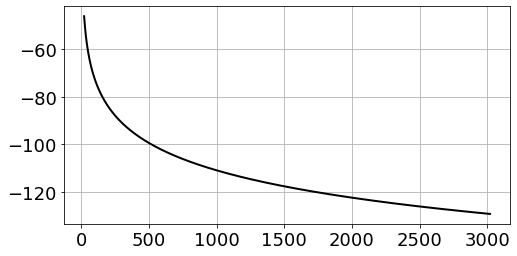

In [195]:
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams.update({'font.size': 18})

# Define domain
dx = .05
start_value = 20
L = max_dist_m = 10*np.pi #30
L = max_dist_m = 3000

# x = L * np.arange(20+dx,2000+dx,dx)
x = dm = np.arange(  start_value+dx,  start_value+dx+max_dist_m,  dx  )
# print('x=dm=',dm)

# path loss
# f = -hata_v1(x)
f = np.cos(3*x)
f = np.cos(x)
# f=x**2
f= np.log10(x)
f = -hata_v1(x)

n = len(x)
# print('f=',f)
# nquart = int(np.floor(n/4))

fig, ax = plt.subplots()
ax.plot(x, f,'-',color='k',LineWidth=2)
ax.grid(True)

In [196]:
k=1
np.cos(2*np.pi*k*x/L)[:10]

array([0.99911844, 0.99911404, 0.99910963, 0.9991052 , 0.99910077,
       0.99909632, 0.99909187, 0.9990874 , 0.99908292, 0.99907843])

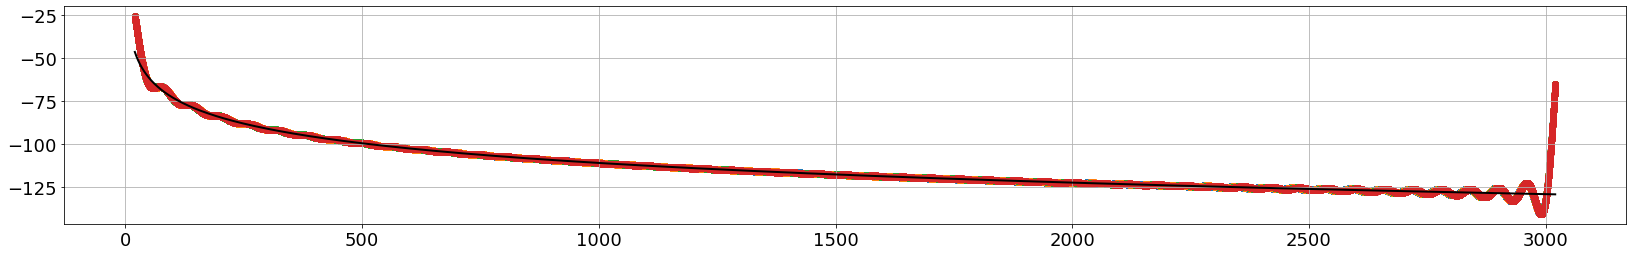

In [214]:
plt.rcParams['figure.figsize'] = [28, 4]
fig, ax = plt.subplots()
ax.plot(x, f,'-',color='k',LineWidth=2)
ax.grid(True)

# A0 = (2/L)*np.sum(f * np.ones_like(x)) * dx
A0 = (2/L)*np.sum(f) * dx
fFS = A0/4

Ncoef = 100
A = np.zeros(Ncoef)
B = np.zeros(Ncoef)
for k in range(Ncoef):
#     A[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L)) * dx # Inner product
    A[k] = (1/L)*np.sum(f * np.cos(1*np.pi*(k+1)*x/L)) * dx # Inner product
    B[k] = (1/L)*np.sum(f * np.sin(1*np.pi*(k+1)*x/L)) * dx # Inner product
    fFS = fFS + A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)
    if Ncoef-k<5:
        ax.scatter(x,fFS,)

In [199]:
A0/4

-56.59729576813019

In [201]:
print(A[:10])
print(B[:10])

[10.8089168   3.06913317  3.9980612   1.30069825  2.77827862  0.66967768
  2.27132761  0.34653756  1.99274649  0.15074317]
[-73.47919824   6.40337048 -22.42349297   4.07312578 -12.87189308
   3.04698652  -8.89974577   2.45149238  -6.73318085   2.05552176]


In [216]:
L

3000

In [202]:
np.sum(f)*dx/L*2

-226.38918307252072

In [203]:
A0 = np.sum(f * np.ones_like(x)) * dx
# fFS = A0/2
A0

-339583.7746087811

In [204]:
dx

0.05

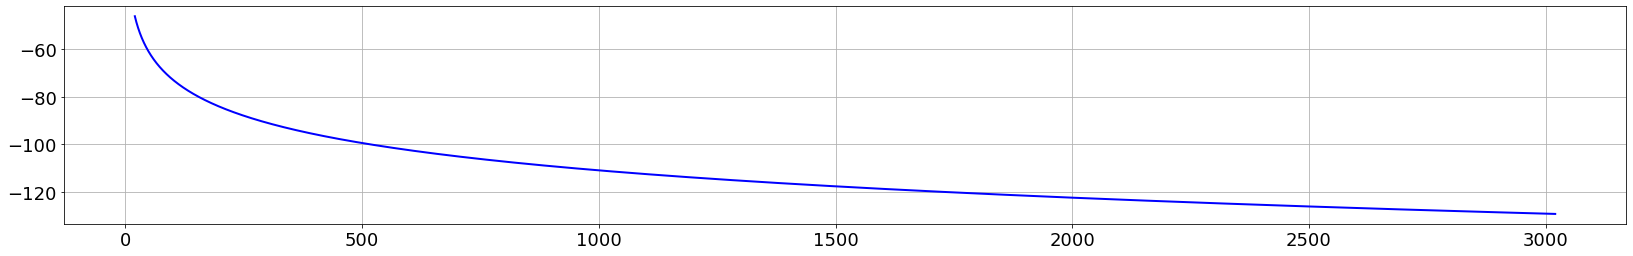

In [215]:
fig, ax = plt.subplots()
ax.plot(x,f,'-',color='b',LineWidth=2)
ax.grid(True)

In [206]:
len(f)

60000

In [205]:
len(x)

60000

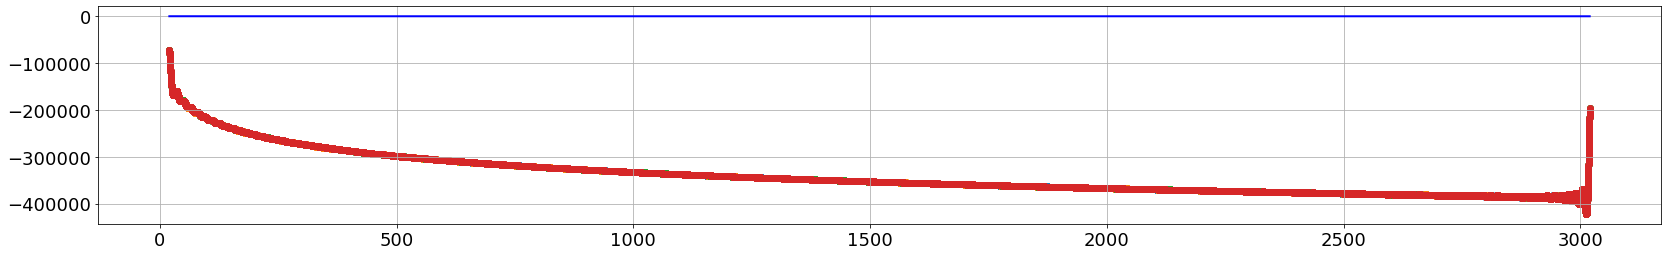

In [213]:
fig, ax = plt.subplots()
ax.plot(x,f,'-',color='b',LineWidth=2)
ax.grid(True)

# # Define hat function
# f = np.zeros_like(x)
# f[nquart:2*nquart] = (4/n)*np.arange(1,nquart+1)
# f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0,nquart)

# fig, ax = plt.subplots()
# ax.plot(x,f,'-',color='k',LineWidth=2)

# Compute Fourier series
name = "Accent"
cmap = get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color=colors)

A0 = np.sum(f * np.ones_like(x)) * dx
fFS = A0/2

Ncoef = 400
A = np.zeros(Ncoef)
B = np.zeros(Ncoef)
for k in range(Ncoef):
    A[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L)) * dx # Inner product
    B[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L)) * dx
    fFS = fFS + A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)
    if Ncoef-k<5:
        ax.scatter(x,fFS,)    


In [52]:
print('A=',A)
print('B=',B)

A= [-2.16047706 -2.2190752  -2.22991702 -2.23369334]
B= [14.13691789  6.89162252  4.39478107  3.08208092]


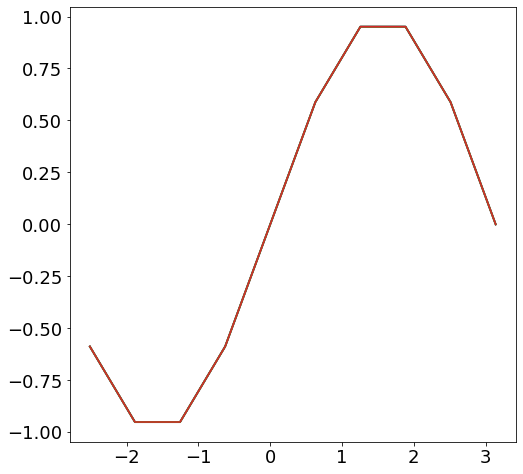

In [81]:
# Define domain
dx = 0.2
L = np.pi
x = L * np.arange(-1+dx,1+dx,dx)
n = len(x)
nquart = int(np.floor(n/4))

# Define hat function
f = np.zeros_like(x)
f[nquart:2*nquart] = (4/n)*np.arange(1,nquart+1)
f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0,nquart)


f=np.sin(x)

# f=np.sin(x) + 3*np.sin(4*x)

fig, ax = plt.subplots()
ax.plot(x,f,'-',color='k',LineWidth=2)

# Compute Fourier series
name = "Accent"
cmap = get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color=colors)

A0 = np.sum(f * np.ones_like(x)) * dx
fFS = A0/2

Ncoef=4
A = np.zeros(Ncoef)
B = np.zeros(Ncoef)
for k in range(Ncoef):
    A[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L)) * dx # Inner product
    B[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L)) * dx
    fFS = fFS + A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)
    ax.plot(x,fFS,'-')

In [82]:
x

array([-2.51327412e+00, -1.88495559e+00, -1.25663706e+00, -6.28318531e-01,
       -6.97573700e-16,  6.28318531e-01,  1.25663706e+00,  1.88495559e+00,
        2.51327412e+00,  3.14159265e+00])

In [83]:
f

array([-5.87785252e-01, -9.51056516e-01, -9.51056516e-01, -5.87785252e-01,
       -6.97573700e-16,  5.87785252e-01,  9.51056516e-01,  9.51056516e-01,
        5.87785252e-01,  1.45473231e-15])

In [84]:
print('ERR=',ERR )
print(thresh)

ERR= [1.        0.9486833 0.9486833 0.9486833]
4.381780460041329


In [85]:
 np.max(np.where(ERR > thresh))

ValueError: zero-size array to reduction operation maximum which has no identity

In [86]:
ERR > thresh

array([False, False, False, False])

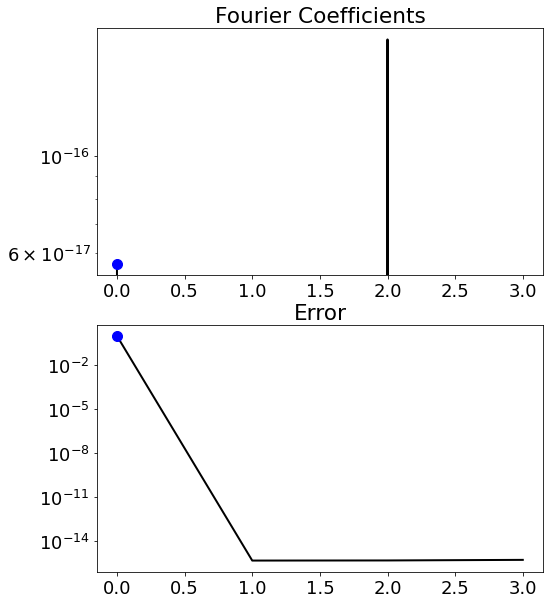

In [88]:
## Plot amplitudes

plt.rcParams['figure.figsize'] = [8, 10]
plt.rcParams.update({'font.size': 18})


fFS = (A0/2) * np.ones_like(f)
kmax = 4
A = np.zeros(kmax)
B = np.zeros(kmax)
ERR = np.zeros(kmax)

A[0] = A0/2
ERR[0] = np.linalg.norm(f-fFS)/np.linalg.norm(f)

for k in range(1,kmax):
    A[k] = np.sum(f * np.cos(np.pi*k*x/L)) * dx
    B[k] = np.sum(f * np.sin(np.pi*k*x/L)) * dx
    fFS = fFS + A[k] * np.cos(k*np.pi*x/L) + B[k] * np.sin(k*np.pi*x/L)
    ERR[k] = np.linalg.norm(f-fFS)/np.linalg.norm(f)
    
thresh = np.median(ERR) * np.sqrt(kmax) * (4/np.sqrt(3))

r = np.max(np.where(ERR > thresh))

fig, axs = plt.subplots(2,1)
axs[0].semilogy(np.arange(kmax),A,color='k',LineWidth=2)
axs[0].semilogy(r,A[r],'o',color='b',MarkerSize=10)
plt.sca(axs[0])
plt.title('Fourier Coefficients')

axs[1].semilogy(np.arange(kmax),ERR,color='k',LineWidth=2)
axs[1].semilogy(r,ERR[r],'o',color='b',MarkerSize=10)
plt.sca(axs[1])
plt.title('Error')

plt.show()

In [89]:
A

array([ 5.66553890e-17, -1.91026390e-16,  1.85475275e-16, -7.44529721e-17])